# Explore Exercises

<hr style="border:2px solid gray">

<b>Our Zillow scenario continues</b>:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

7. Come up with some initial hypotheses based on your goal of predicting property value.

8. Visualize all combinations of variables in some way.

9. Run the appropriate statistical tests where needed.

10. What independent variables are correlated with the dependent variable, home value?

11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13. Explore your dataset with any other visualizations you think will be helpful.

<b>Bonus Exercise</b>
<br>
In a seperate notebook called explore_mall, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

<hr style="border:1px solid black">
<hr style="border:1px solid black">

In [1]:
#import ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import standard ds libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import stats libraries
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

#import custom modules
import env
import wrangle

In [2]:
#bring in our clean zillow df
df = wrangle.wrangle_zillow()

In [3]:
#call that df and look at the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130214 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   home_value  float64
 4   year_built  float64
 5   yearly_tax  float64
 6   fips        float64
dtypes: float64(7)
memory usage: 130.0 MB


<hr style="border:1px solid black">

### #1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

<hr style="border:1px solid black">

### #2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [4]:
#let's use our function that splits our clean zillow data
train, validate, test = wrangle.split_clean_zillow()

In [5]:
#take a look 
train.shape, validate.shape, test.shape

((1192919, 7), (511252, 7), (426043, 7))

In [6]:
#see what columns we're dealing with
train.head()

,bedrooms,bathrooms,sqft,home_value,year_built,yearly_tax,fips
553191,4.0,2.0,1556.0,373090.0,1923.0,4579.25,6037.0
1209132,3.0,2.0,1513.0,74070.0,1937.0,986.55,6037.0
174634,4.0,2.0,2040.0,138000.0,1954.0,2553.05,6037.0
170584,3.0,2.0,1834.0,263870.0,1959.0,3139.76,6059.0
2001226,2.0,2.0,1225.0,335603.0,1975.0,3461.38,6059.0


In [7]:
#take a look at the descriptive stats for numeric columns
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,1192919.0,3.301677,0.931975,0.00,3.000,3.00,4.00,25.00
bathrooms,1192919.0,2.240727,0.991658,0.00,2.000,2.00,3.00,20.00
sqft,1192919.0,1864.527770,1085.088243,1.00,1259.000,1624.00,2208.00,531118.00
home_value,1192919.0,461201.967523,673009.840136,22.00,189638.000,328387.00,535000.00,83196095.00
year_built,1192919.0,1960.915599,22.137113,1801.00,1949.000,1958.00,1975.00,2016.00
yearly_tax,1192919.0,5623.600602,7759.250268,13.36,2548.215,4113.72,6417.55,994030.96
fips,1192919.0,6048.253723,20.315987,6037.00,6037.000,6037.00,6059.00,6111.00


<hr style="border:1px solid black">

### #3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [8]:
#Create a function to visualize
def plot_variable_pairs(df, target):
    '''
    This function takes in a dataframe and a target
    and returns visuals of the features and that target
    '''
    sns.pairplot(df, corner = True, kind= 'reg', plot_kws={'line_kws':{'color':'red'}})

<hr style="border:1px solid black">

### #4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [9]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    '''
    this function that accepts your dataframe 
    and the name of the columns that hold the continuous and categorical features 
    outputs: 3 different plots for visualizing a categorical variable and a continuous variable.
    '''
    sns.swarmplot(data=df.sample(1000), x=categorical_var, y=continuous_var)
    plt.ylim([0,7000000])
    plt.show()   
    
    sns.boxplot(data=df.sample(1000), x=categorical_var, y=continuous_var)
    plt.ylim([0,5000000])
    plt.show()    
    
    sns.barplot(data=df, x=categorical_var, y=continuous_var)
    plt.show()

<hr style="border:1px solid black">

### #5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [10]:
import explore

<hr style="border:1px solid black">

### #6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

<b>Note</b>:
    <br>
- Make sure that for this dataset you use a .sample or these visuals will take a considerate amount of time to load.

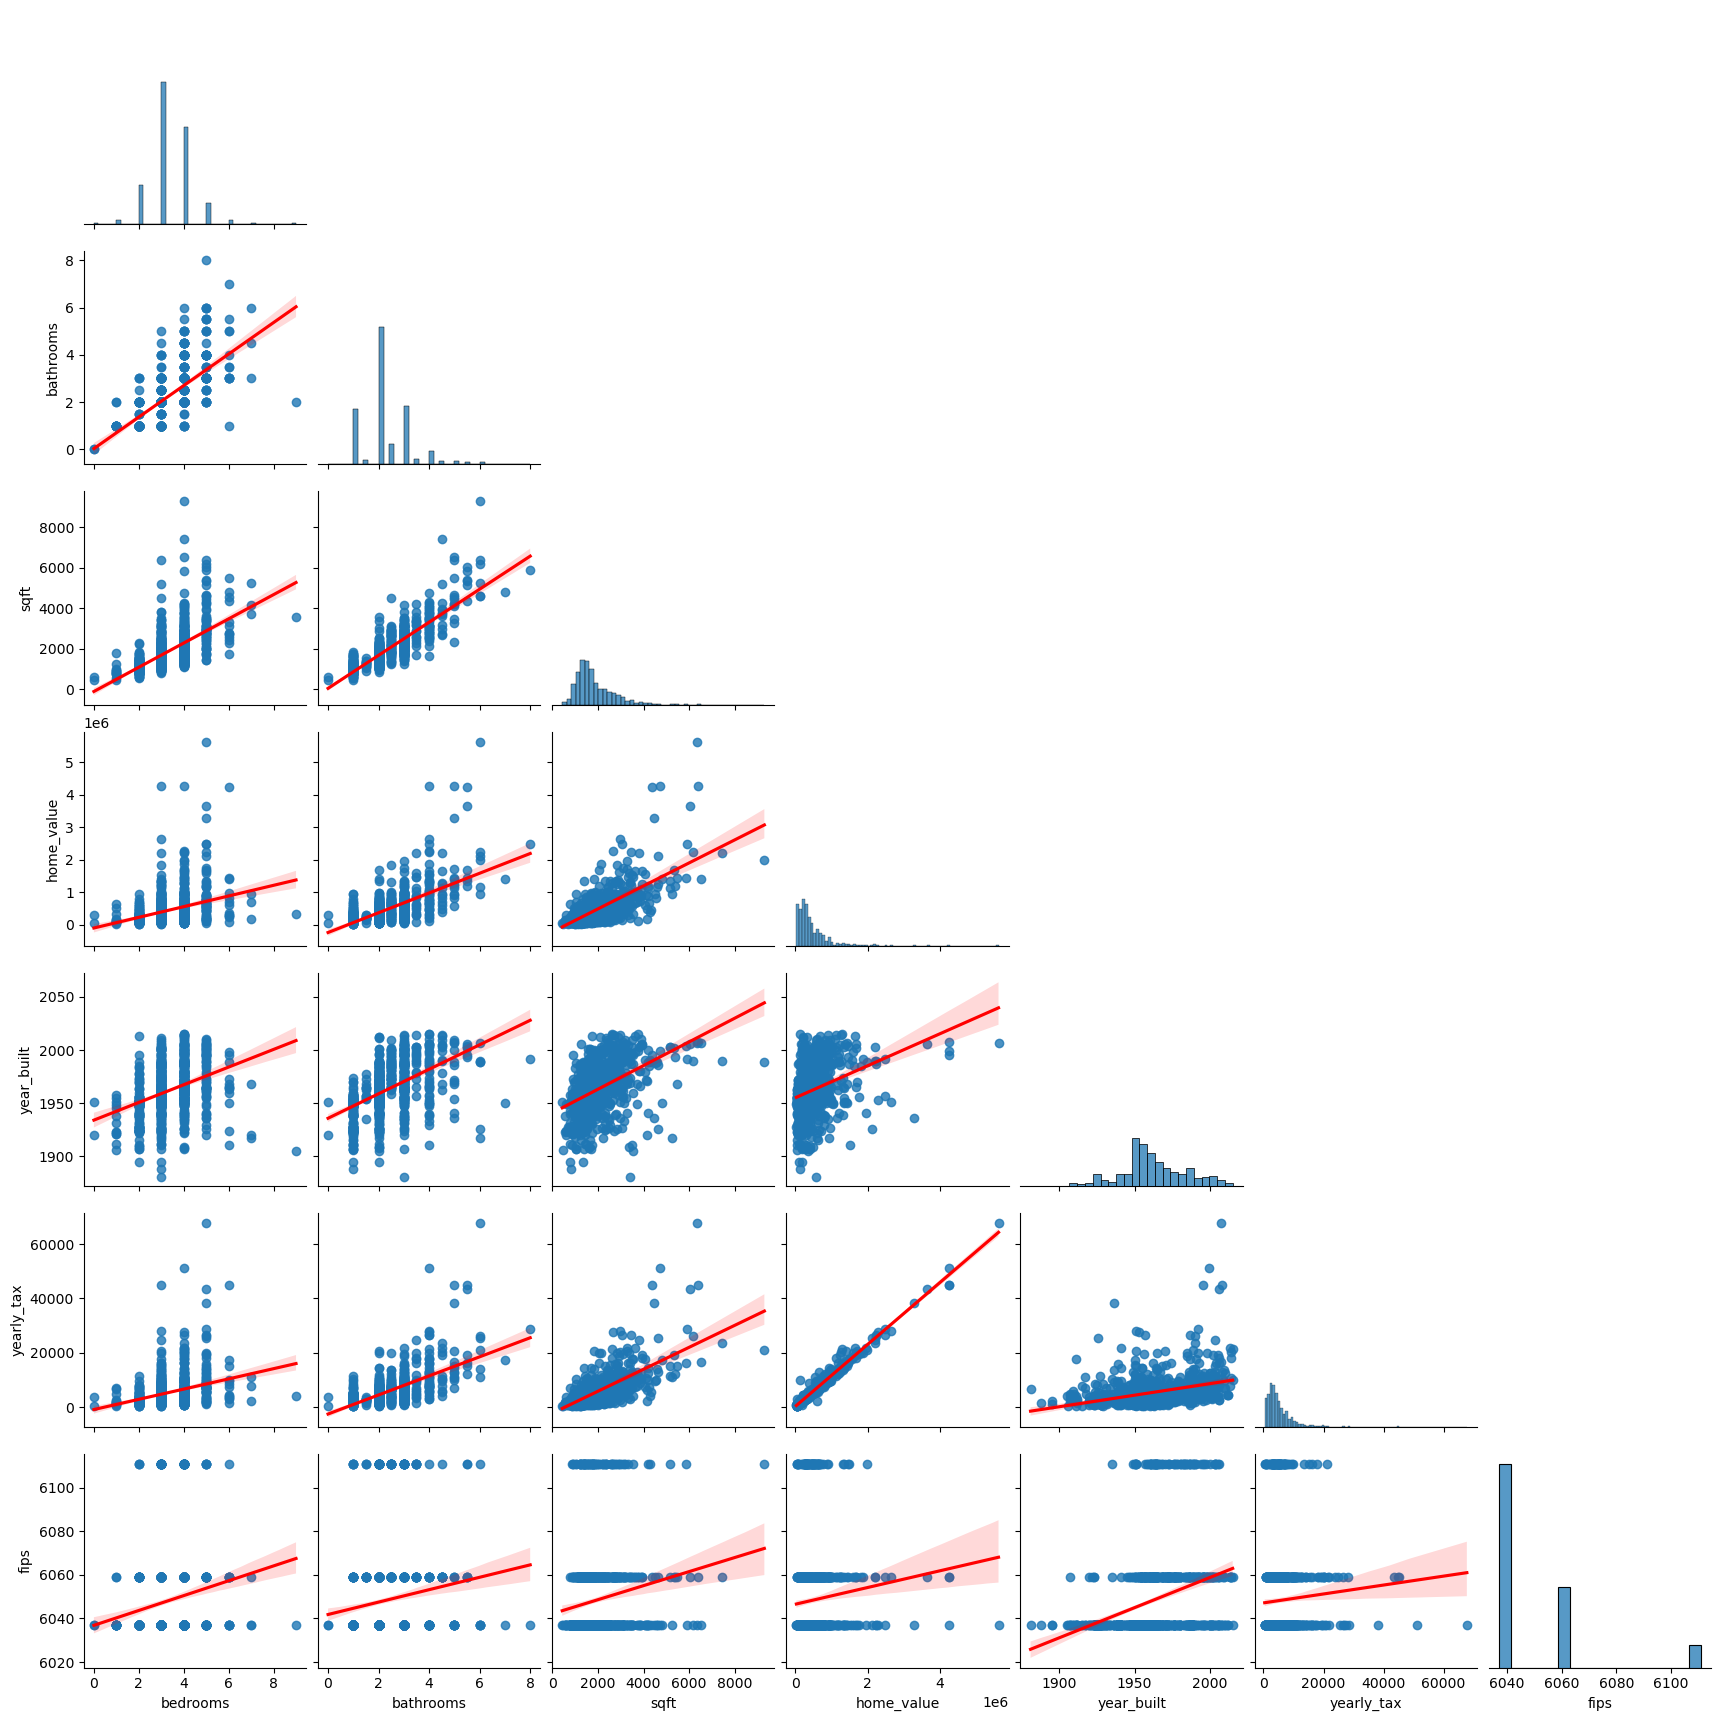

In [11]:
explore.plot_variable_pairs(train, 'home_value')

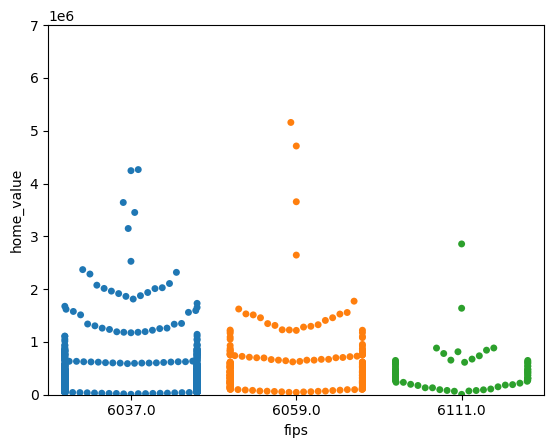

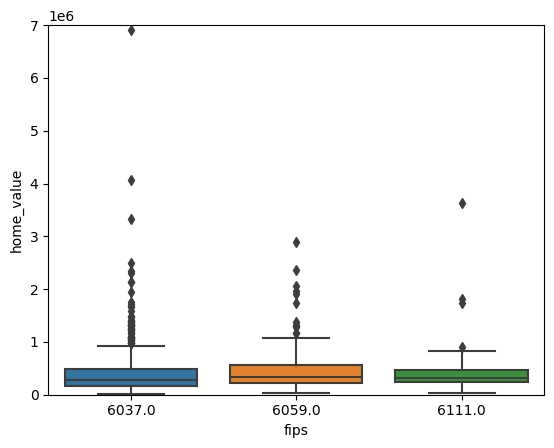

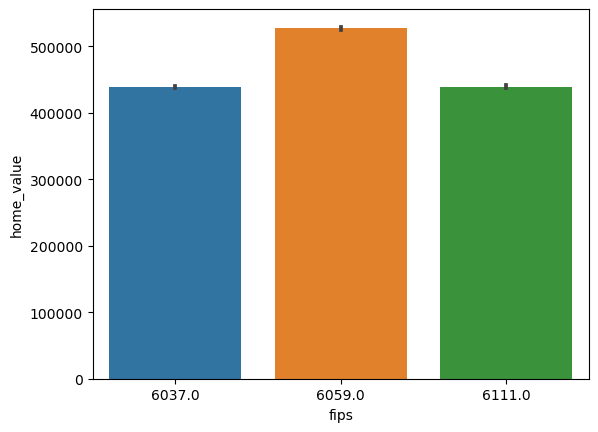

In [12]:
plot_categorical_and_continuous_vars(train, 'fips', 'home_value')

<hr style="border:1px solid black">

### #7. Come up with some initial hypotheses based on your goal of predicting property value.

- $H_{0}$ = Bedroom count is correlated with home value.
- $H_{0}$ = Bathroom count is correlated with home value.
- $H_{0}$ = Square footage is correlated with home value.
- $H_{0}$ = Location is correlated with home value.

<b>Notes</b>:
    <br>
- Let's make sure we are clear on our data.
<br>

- ```home_value``` is target
<br>

- ```Bedrooms``` is continuous- pearsonsR
- ```Bathrooms``` is continuous- pearsonsR
- ```sqft``` is continuous- pearsonsR
- ```fips``` is categorical- T-test

<hr style="border:1px solid black">

### #8. Visualize all combinations of variables in some way.

In [13]:
#assign a variable the correlation so we can use it later
train_corr = train.corr()

In [14]:
#let's take a look at the correlation in train
train_corr

,bedrooms,bathrooms,sqft,home_value,year_built,yearly_tax,fips
bedrooms,1.000000,0.641983,0.539584,0.259286,0.377385,0.260512,0.136412
bathrooms,0.641983,1.000000,0.744199,0.507247,0.509533,0.507785,0.097763
sqft,0.539584,0.744199,1.000000,0.548269,0.392739,0.546605,0.086191
home_value,0.259286,0.507247,0.548269,1.000000,0.193014,0.990425,0.018351
year_built,0.377385,0.509533,0.392739,0.193014,1.000000,0.194676,0.300607
yearly_tax,0.260512,0.507785,0.546605,0.990425,0.194676,1.000000,-0.005263
fips,0.136412,0.097763,0.086191,0.018351,0.300607,-0.005263,1.000000


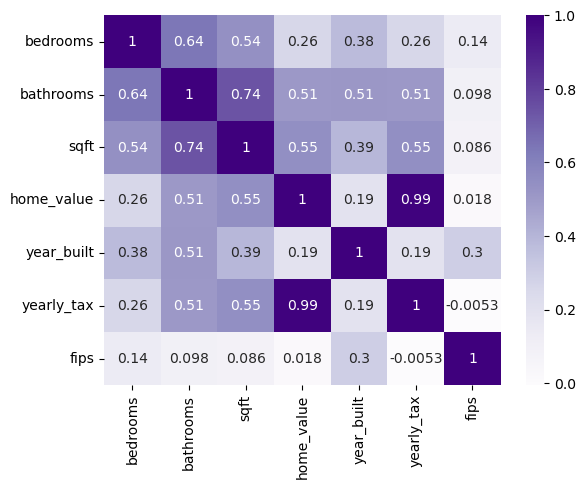

In [15]:
#we can visualize this correlation with a heatmap as well
sns.heatmap(train_corr, cmap='Purples', annot=True)

plt.show()

<hr style="border:1px solid black">

### #9. Run the appropriate statistical tests where needed.

<b>Note</b>:
    <br>
    
- Why ar we using pearsonr?
- PearsonR: tests for linear correlation between two continuous variables
<br>

- bedroom and home value are both continuous
- bathroom and home value are both continuous
- sqft and home value are both continuous

In [16]:
alpha = 0.05

r_bed, p_bed = pearsonr(x=train['bedrooms'], y=train['home_value'])

r_bath, p_bath = pearsonr(x=train['bathrooms'], y=train['home_value'])

r_sqft, p_sqft = pearsonr(x=train['sqft'], y=train['home_value'])

In [17]:
r_bed, p_bed

(0.25928648349438493, 0.0)

In [18]:
r_bath, p_bath

(0.5072472879887935, 0.0)

In [19]:
r_sqft, p_sqft

(0.5482685650196929, 0.0)

<hr style="border:1px solid black">

### #10. What independent variables are correlated with the dependent variable, home value?

In [20]:
if p_bed < alpha:
    print('The number of bedrooms is correlated with home value.')
    print('The correlation coefficient is {}.'.format(r_bed))
else:
    print('The number of bedrooms is NOT correlated with home value.')

print() 
print()
    
if p_bath < alpha:
    print('The number of bathrooms is correlated with home value.')
    print('The correlation coefficient is {}.'.format(r_bath))
else:
    print('The number of bathrooms is NOT correlated with home value.')

print() 
print()

if p_sqft < alpha:
    print('The square footage is correlated with home value.')
    print('The correlation coefficient is {}.'.format(r_sqft))
else:
    print('The number of square footage is NOT correlated with home value.')


The number of bedrooms is correlated with home value.
The correlation coefficient is 0.25928648349438493.


The number of bathrooms is correlated with home value.
The correlation coefficient is 0.5072472879887935.


The square footage is correlated with home value.
The correlation coefficient is 0.5482685650196929.


<b>Note</b>:
    <br>
- In this instance:
    - p_bed <b>is</b> less than α of 0.05 so, there is a correlation.
    - p_bath <b>is</b> less than α of 0.05 so, there is a correlation.
    - p_sqft <b>is</b> less than α of 0.05 so, there is a correlation.

<hr style="border:1px solid black">

### #11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [21]:
r_ind, p_ind = pearsonr(x=train['sqft'], y=train['bathrooms'])

In [22]:
r_ind, p_ind

(0.7441988892389748, 0.0)

In [23]:
if p_ind < alpha:
    print('The number of bathrooms is correlated with the square footage.')
    print('The correlation coefficient is {}.'.format(r_ind))
else:
    print('The number of bathrooms is NOT correlated with the square footage.')

The number of bathrooms is correlated with the square footage.
The correlation coefficient is 0.7441988892389748.


<hr style="border:1px solid black">

### #12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

<hr style="border:1px solid black">

### #13. Explore your dataset with any other visualizations you think will be helpful.

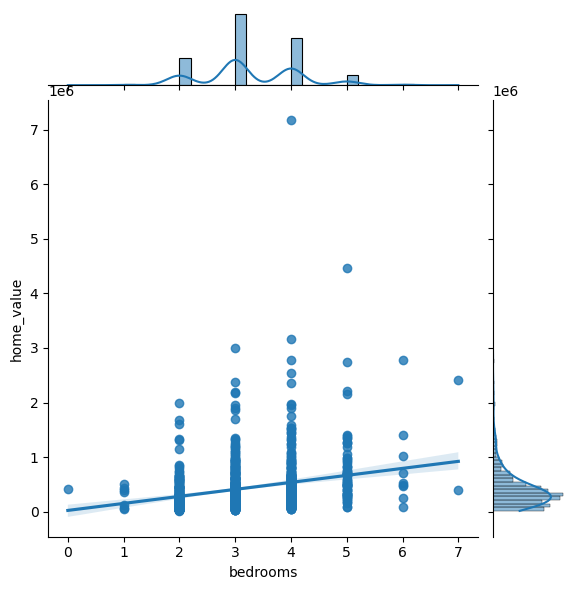

In [24]:
sns.jointplot(x='bedrooms', y ='home_value', data=train.sample(1000), kind='reg')
plt.show()

<hr style="border:1px solid black">
<hr style="border:1px solid black">

## Bonus:

In a seperate notebook called explore_mall, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

In [32]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    '''
    this function that accepts your dataframe 
    and the name of the columns that hold the continuous and categorical features 
    outputs: 3 different plots for visualizing a categorical variable and a continuous variable.
    '''
    sns.swarmplot(data=df, x=categorical_var, y=continuous_var)
    plt.show()   
    
    sns.boxplot(data=df, x=categorical_var, y=continuous_var)
    plt.show()    
    
    sns.barplot(data=df, x=categorical_var, y=continuous_var)
    plt.show()

In [33]:
def get_mall_customers_data():
    '''
    This function reads in the mall_customers data from the Codeup db
    and returns a pandas Dataframe
    '''
    
    mall_customers_query = '''
    SELECT *
    FROM customers
    '''
    return pd.read_sql(mall_customers_query, get_connection('mall_customers'))


In [34]:
# Create helper function to get the necessary connection url.
def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [35]:
mall_df= get_mall_customers_data()

In [36]:
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [38]:
plot_variable_pairs(mall_df, 'spending_score')

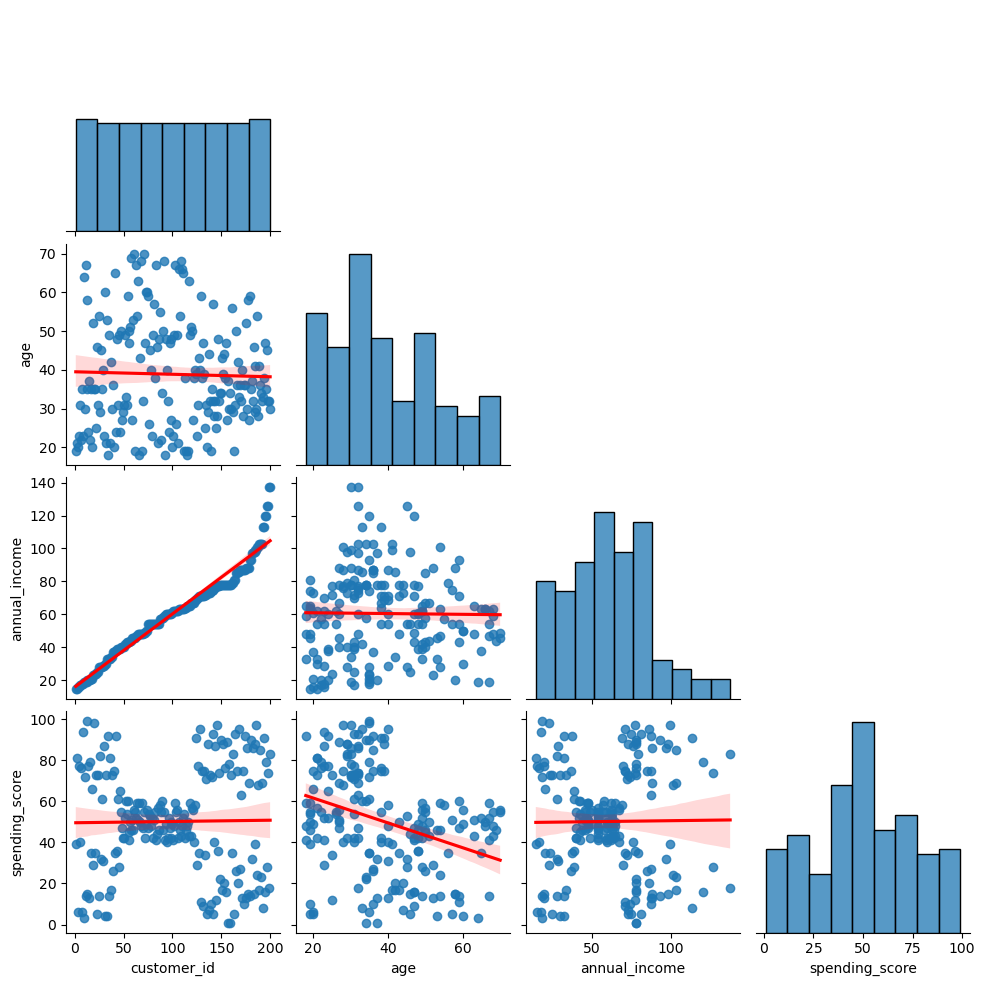

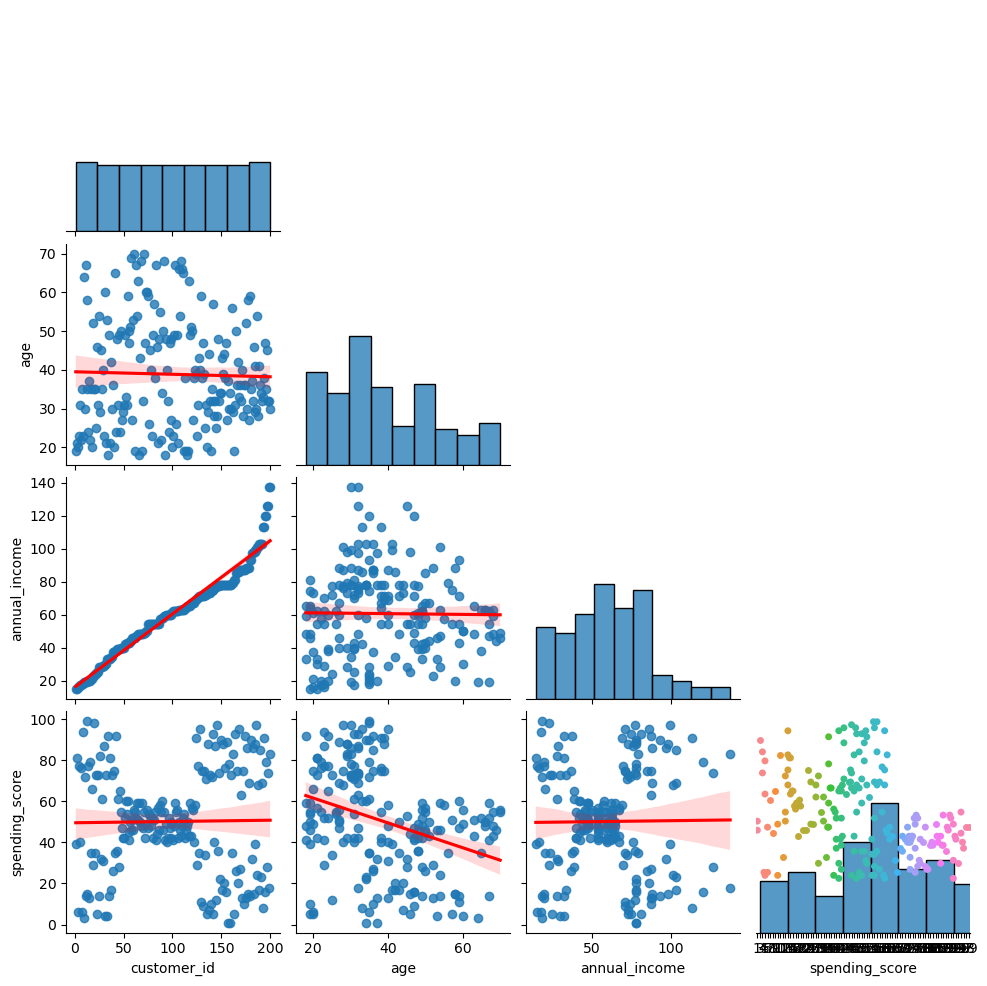

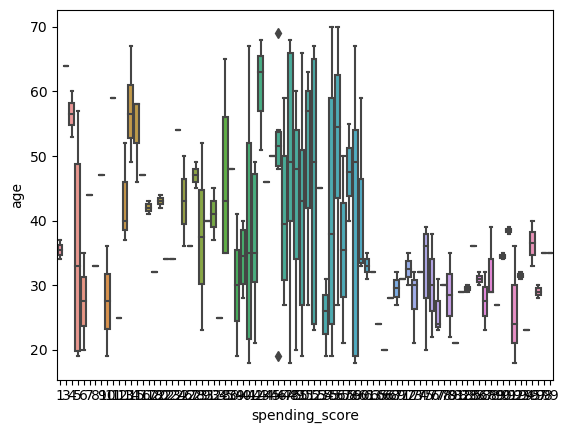

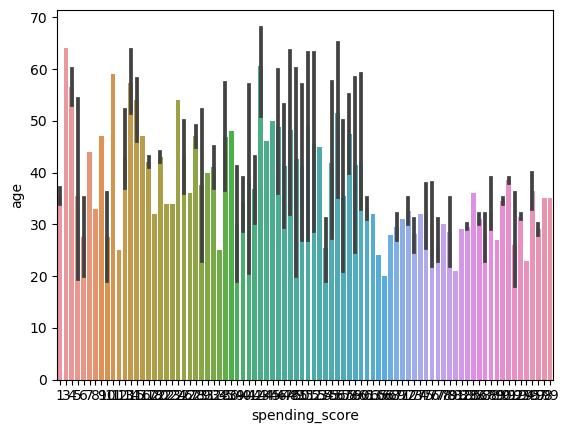

In [39]:
plot_categorical_and_continuous_vars(mall_df, 'spending_score', 'age')